In [85]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import torch
from torch import nn

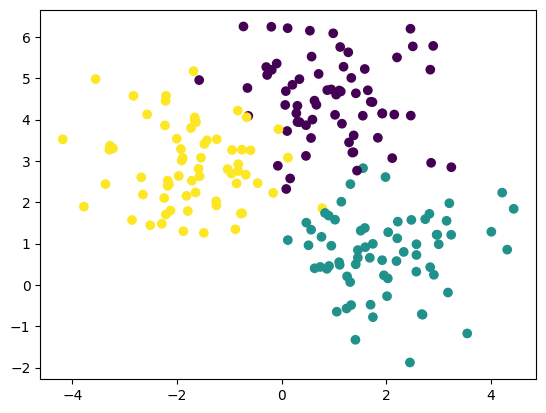

In [82]:
X, y = make_blobs(200, centers=3, random_state=0, n_features=2)

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c=y)

In [83]:
Xpy = torch.from_numpy(X).type(torch.float)
ypy = torch.from_numpy(y).type(torch.float)

Xpy_train, Xpy_test, ypy_train, ypy_test = train_test_split(Xpy,ypy, test_size=0.2, random_state=0)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Softmax(),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=3),
)

model_0.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

torch.argmax(nn.Softmax(1)(model_0(Xpy_test)),1)

/home/kamilzielinskidev/machine-learning/pytorch_for_deep_learning/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0,
        2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2])